In [ ]:
#1 objective = energy purchase kWhr x electrict tariff
#2 objective = overall LF

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
plt.rcParams['figure.figsize'] = 20, 10
import matplotlib.gridspec as gridspec
plt.rcParams.update({'font.size': 22})
from math import isnan


In [2]:
def connectpoints(x,y,x_mean,y_mean,color):
#     x1, x2 = x[p1], x[p2]
#     y1, y2 = y[p1], y[p2]
#     plt.plot([x1,x2],[y1,y2],'k-')
    for x_value, y_value in zip(x,y):
        plt.plot([x_value,x_mean],[y_value,y_mean],color=color)

In [3]:
#tariff rate: off-peak (0.00-9.00, 22.00-24.00) = 2.6295
# peak (9.00 -22.00 )=4.2097
#energy charge = 132.93 THB/kW
array_tarrif=np.array([2.6295 for x in np.arange(0,18,1)]+[4.2097 for x in np.arange(0,26,1)]+[2.6295 for x in np.arange(0,4,1)])

In [4]:
dict_AMR_MC=np.load('dict_MC_AMR.npy')[()]


In [5]:
dict_tarrif={}
for AMR_id in list(dict_AMR_MC.keys()):
    dict_tarrif.update({AMR_id:np.array([2.6295 for x in np.arange(0,18,1)]+[4.2097 for x in np.arange(0,26,1)]+[2.6295 for x in np.arange(0,4,1)])})

In [6]:
dict_tarrif

{21652: array([2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295,
        2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295,
        2.6295, 2.6295, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097,
        4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097,
        4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097,
        4.2097, 4.2097, 4.2097, 4.2097, 2.6295, 2.6295, 2.6295, 2.6295]),
 21654: array([2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295,
        2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295,
        2.6295, 2.6295, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097,
        4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097,
        4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097, 4.2097,
        4.2097, 4.2097, 4.2097, 4.2097, 2.6295, 2.6295, 2.6295, 2.6295]),
 21655: array([2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295, 2.6295,
        2.6295, 2.6295, 2.6295, 2.6295,

AMR id: 21652
AMR id: 136898
AMR id: 137091
AMR id: 137138
AMR id: 42432
AMR id: 66543
AMR id: 21654
AMR id: 42421
AMR id: 42423
AMR id: 43958
AMR id: 137110
AMR id: 42422
AMR id: 21655
AMR id: 42431
AMR id: 44834
AMR id: 56452
AMR id: 56457
AMR id: 56458
AMR id: 124642
AMR id: 124647
AMR id: 124649
AMR id: 124656
AMR id: 124683
AMR id: 185767
AMR id: 56448
AMR id: 136900
AMR id: 137094
AMR id: 164978
AMR id: 189318
AMR id: 193781
AMR id: 44318
AMR id: 124687
AMR id: 21689
AMR id: 44831
AMR id: 56459
AMR id: 124678


/Users/pornchaichaweewat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


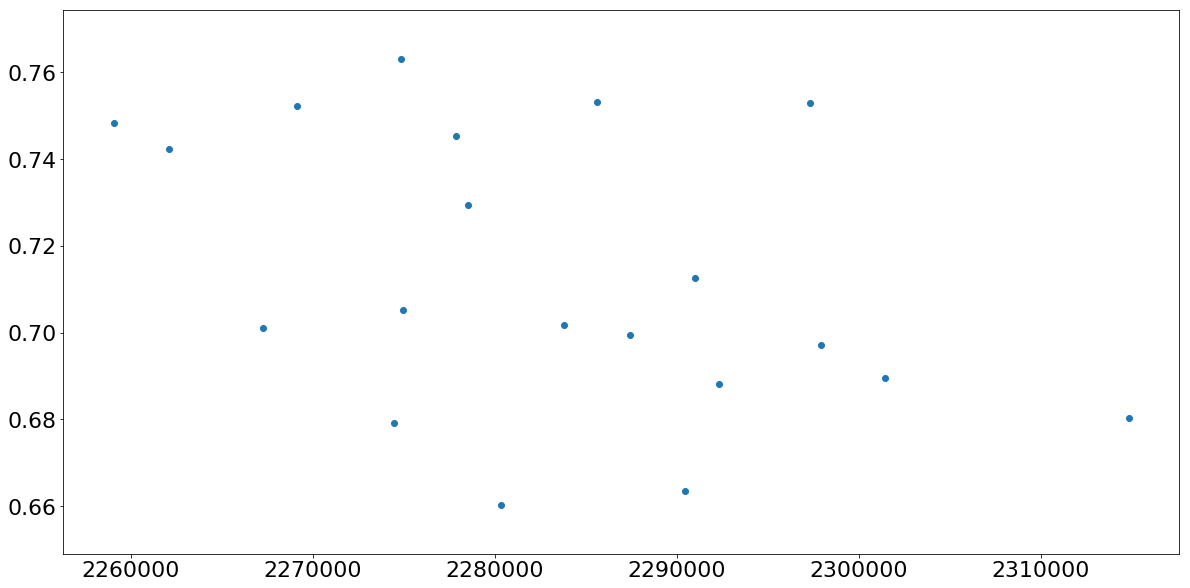

In [7]:
dict_AMR_MC=np.load('dict_MC_AMR.npy')[()]
dict_AMR_avg_cost_LF={}

#energy purchasing
array_sub_cost=([[],[],[],[],[],
                  [],[],[],[],[],
                  [],[],[],[],[],
                  [],[],[],[],[]])
for AMR_id in list(dict_AMR_MC.keys()):
    print('AMR id:', AMR_id)
    array_kW=np.array([[],[],[],[],[],
                  [],[],[],[],[],
                  [],[],[],[],[],
                  [],[],[],[],[]])
    array_LF=np.array([])
    for t in list(dict_AMR_MC[AMR_id].keys()):
        kW_data=np.array([[dict_AMR_MC[AMR_id][t][sample]] for sample in np.arange(0,20,1)])
        array_kW=np.append(array_kW, kW_data, axis=1)

    LF_data=np.array([x.mean()/x.max() for x in array_kW])
    array_AMR_cost=array_kW*dict_tarrif[AMR_id]

    dict_AMR_avg_cost_LF.update({AMR_id:{'cost':array_AMR_cost.sum(axis=1), 'LF':LF_data, 
                                         "avg_cost":array_AMR_cost.sum(axis=1).sum()/20, "avg_LF":LF_data.mean() }})

    array_sub_cost=np.append(array_sub_cost, np.array([[x] for x in array_AMR_cost.sum(axis=1)]), axis=1)
array_sub_cost=np.array([x.sum() for x in array_sub_cost])


del dict_AMR_avg_cost_LF[42422]

#find substation LF
array_sub_LF=np.array([])
for sample in np.arange(0,20,1):
    array_sum_kW=np.array([])
    for t in ['t{}'.format(x) for x in np.arange(0,48,1)]:
        array_AMR_kW=np.array([dict_AMR_MC[AMR_id][t][sample] for AMR_id in list(dict_AMR_MC.keys())])
        array_sum_kW=np.append(array_sum_kW,array_AMR_kW.sum())
    LF=array_sum_kW.mean()/array_sum_kW.max()
    array_sub_LF=np.append(array_sub_LF,LF)

fig, ax = plt.subplots()
ax.scatter(array_sub_cost,array_sub_LF)
plt.show()



In [8]:
dict_AMR_avg_cost_LF

{21652: {'LF': array([0.42550505, 0.40593434, 0.33715986, 0.49621212, 0.50568182,
         0.4040404 , 0.53724747, 0.3984375 , 0.4229798 , 0.42171717,
         0.55492424, 0.34141156, 0.38510101, 0.38825758, 0.47537879,
         0.51893939, 0.43371212, 0.32610544, 0.44986979, 0.48863636]),
  'avg_LF': 0.435862591959132,
  'avg_cost': 77237.00835,
  'cost': array([71846.454, 68832.147, 82466.325, 82909.656, 84282.555, 70017.672,
         94531.803, 63447.54 , 71293.884, 73506.414, 89629.683, 82591.491,
         65612.664, 66338.931, 79784.985, 89447.184, 69458.727, 84539.637,
         73519.341, 80683.074])},
 21654: {'LF': array([0.19642857, 0.1640625 , 0.14880952, 0.10416667, 0.10416667,
         0.16964286, 0.10714286, 0.1875    , 0.1640625 , 0.13020833,
         0.140625  , 0.13802083, 0.203125  , 0.23511905, 0.125     ,
         0.20833333, 0.18489583, 0.15178571, 0.16666667, 0.19047619]),
  'avg_LF': 0.1610119047619048,
  'avg_cost': 6210.724499999999,
  'cost': array([6770.808, 7

In [24]:
for key1 in list(dict_AMR_avg_cost_LF.keys()):
    dict_AMR_avg_cost_LF[key1].update({'max_cost':dict_AMR_avg_cost_LF[key1]['cost'].max(),
                                      'min_cost':dict_AMR_avg_cost_LF[key1]['cost'].min(),
                                      'sd_cost':np.std(dict_AMR_avg_cost_LF[key1]['cost']),
                                      'max_LF':dict_AMR_avg_cost_LF[key1]['LF'].max(),
                                      'min_LF':dict_AMR_avg_cost_LF[key1]['LF'].min(),
                                      'sd_LF':np.std(dict_AMR_avg_cost_LF[key1]['LF'])})

In [25]:
dict_AMR_avg_cost_LF

{21652: {'LF': array([0.42550505, 0.40593434, 0.33715986, 0.49621212, 0.50568182,
         0.4040404 , 0.53724747, 0.3984375 , 0.4229798 , 0.42171717,
         0.55492424, 0.34141156, 0.38510101, 0.38825758, 0.47537879,
         0.51893939, 0.43371212, 0.32610544, 0.44986979, 0.48863636]),
  'avg_LF': 0.435862591959132,
  'avg_cost': 77237.00835,
  'cost': array([71846.454, 68832.147, 82466.325, 82909.656, 84282.555, 70017.672,
         94531.803, 63447.54 , 71293.884, 73506.414, 89629.683, 82591.491,
         65612.664, 66338.931, 79784.985, 89447.184, 69458.727, 84539.637,
         73519.341, 80683.074]),
  'max_LF': 0.5549242424242424,
  'max_cost': 94531.803,
  'min_LF': 0.32610544217687076,
  'min_cost': 63447.54,
  'sd_LF': 0.06471309873388187,
  'sd_cost': 8748.513588954771},
 21654: {'LF': array([0.19642857, 0.1640625 , 0.14880952, 0.10416667, 0.10416667,
         0.16964286, 0.10714286, 0.1875    , 0.1640625 , 0.13020833,
         0.140625  , 0.13802083, 0.203125  , 0.23511905

In [59]:
for AMR_id in list(dict_AMR_avg_cost_LF.keys()):
    print(AMR_id, '&','&','&', 
#           '{:,.0f}'.format(dict_AMR_avg_cost_LF[AMR_id]['min_cost']), '&',
#          '{:,.0f}'.format(dict_AMR_avg_cost_LF[AMR_id]['max_cost']),'&',
         '{:,.0f}'.format(dict_AMR_avg_cost_LF[AMR_id]['avg_cost']),'&',
         '{:,.0f}'.format(dict_AMR_avg_cost_LF[AMR_id]['sd_cost']), '\\', '\\')

21652 & & & 77,237 & 8,749 \ \
136898 & & & 155,553 & 9,814 \ \
137091 & & & 33,058 & 4,064 \ \
137138 & & & 33,287 & 4,428 \ \
42432 & & & 234,394 & 13,161 \ \
66543 & & & 10,216 & 972 \ \
21654 & & & 6,211 & 1,485 \ \
42421 & & & 64,839 & 2,910 \ \
42423 & & & 4,206 & 1,627 \ \
43958 & & & 67,014 & 5,795 \ \
137110 & & & 10,046 & 658 \ \
21655 & & & 3,201 & 577 \ \
42431 & & & 10,343 & 1,339 \ \
44834 & & & 60,980 & 2,693 \ \
56452 & & & 210,350 & 8,138 \ \
56457 & & & 34,282 & 1,600 \ \
56458 & & & 25,900 & 880 \ \
124642 & & & 61,568 & 2,779 \ \
124647 & & & 55,025 & 2,078 \ \
124649 & & & 240,474 & 8,326 \ \
124656 & & & 55,453 & 1,961 \ \
124683 & & & 12,682 & 887 \ \
185767 & & & 19,449 & 1,496 \ \
56448 & & & 49,236 & 2,403 \ \
136900 & & & 82,306 & 2,424 \ \
137094 & & & 236,504 & 14,334 \ \
164978 & & & 8,819 & 1,015 \ \
189318 & & & 146,082 & 2,761 \ \
193781 & & & 59,507 & 6,183 \ \
44318 & & & 29,833 & 2,093 \ \
124687 & & & 3,275 & 205 \ \
21689 & & & 61,861 & 3,784 \ \
4

In [60]:
for AMR_id in list(dict_AMR_avg_cost_LF.keys()):
    print(AMR_id,'&','&', '&', 
#           '{:,.3f}'.format(dict_AMR_avg_cost_LF[AMR_id]['min_LF']), '&',
#          '{:,.3f}'.format(dict_AMR_avg_cost_LF[AMR_id]['max_LF']),'&',
         '{:,.3f}'.format(dict_AMR_avg_cost_LF[AMR_id]['avg_LF']),'&',
         '{:,.3f}'.format(dict_AMR_avg_cost_LF[AMR_id]['sd_LF']), '\\', '\\')

21652 & & & 0.436 & 0.065 \ \
136898 & & & 0.410 & 0.033 \ \
137091 & & & 0.241 & 0.045 \ \
137138 & & & 0.302 & 0.049 \ \
42432 & & & 0.425 & 0.045 \ \
66543 & & & 0.289 & 0.042 \ \
21654 & & & 0.161 & 0.036 \ \
42421 & & & 0.380 & 0.033 \ \
42423 & & & 0.058 & 0.025 \ \
43958 & & & 0.701 & 0.056 \ \
137110 & & & 0.392 & 0.086 \ \
21655 & & & 0.157 & 0.047 \ \
42431 & & & 0.300 & 0.046 \ \
44834 & & & 0.501 & 0.046 \ \
56452 & & & 0.545 & 0.053 \ \
56457 & & & 0.493 & 0.052 \ \
56458 & & & 0.565 & 0.055 \ \
124642 & & & 0.529 & 0.050 \ \
124647 & & & 0.440 & 0.055 \ \
124649 & & & 0.546 & 0.048 \ \
124656 & & & 0.461 & 0.052 \ \
124683 & & & 0.388 & 0.065 \ \
185767 & & & 0.391 & 0.058 \ \
56448 & & & 0.462 & 0.042 \ \
136900 & & & 0.642 & 0.053 \ \
137094 & & & 0.306 & 0.027 \ \
164978 & & & 0.268 & 0.065 \ \
189318 & & & 0.570 & 0.046 \ \
193781 & & & 0.358 & 0.079 \ \
44318 & & & 0.451 & 0.051 \ \
124687 & & & 0.510 & 0.129 \ \
21689 & & & 0.216 & 0.013 \ \
44831 & & & 0.489 & 0.05

In [ ]:
for AMR_id in list(dict_AMR_avg_cost_LF.keys()):
    print(AMR_id, '&','&','&','&','&', '{:,.0f}'.format(dict_AMR_avg_cost_LF[AMR_id]['min_cost']), '&',
         '{:,.0f}'.format(dict_AMR_avg_cost_LF[AMR_id]['max_cost']),'&',
         '{:,.0f}'.format(dict_AMR_avg_cost_LF[AMR_id]['avg_cost']),'&',
         '{:,.0f}'.format(dict_AMR_avg_cost_LF[AMR_id]['sd_cost']), '\\', '\\')

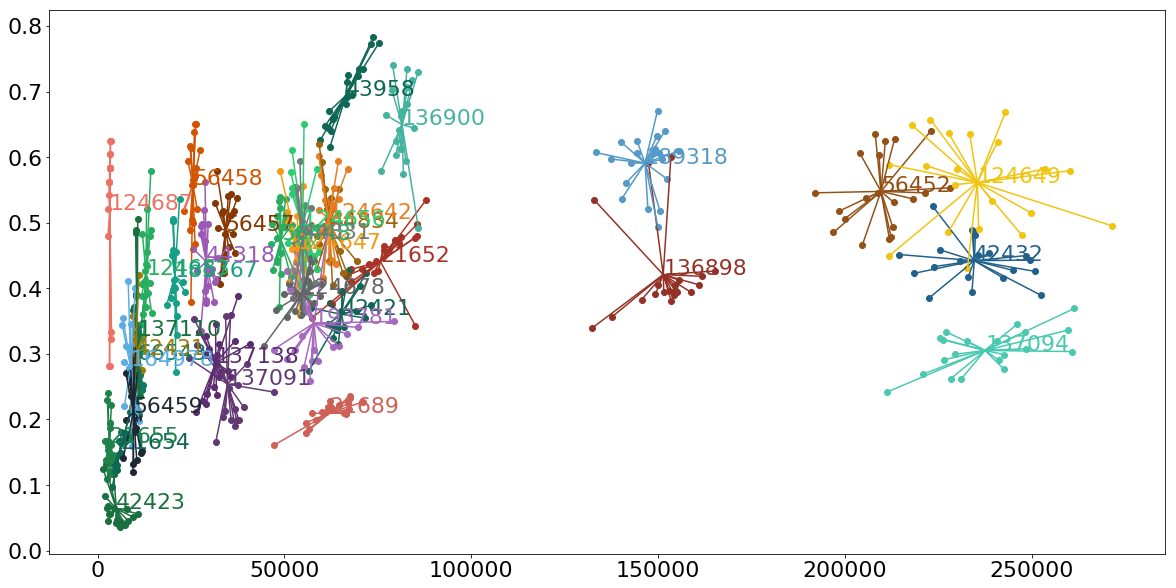

In [160]:
fig, ax = plt.subplots()
list_color=['#A93226', '#943126', '#633974', '#5B2C6F', '#21618C', '#117864', '#0E6655', 
           '#0E6655', '#196F3D', '#0E6655', '#196F3D', '#1D8348', '#9A7D0A', '#9C640C', 
           '#935116', '#873600', '#D35400', '#E67E22', '#F39C12', '#F1C40F', '#2ECC71', 
           '#27AE60', '#16A085', '#27AE60', '#45B39D', '#48C9B0', '#5DADE2', '#5499C7', 
           '#A569BD', '#9B59B6', '#EC7063', '#CD6155', '#707B7C', '#1C2833', '#626567']
# print(len(dict_AMR_avg_cost_LF))
for AMR_id, color in zip(list(dict_AMR_avg_cost_LF.keys()),list_color):
#     print(AMR_id)
    x=dict_AMR_avg_cost_LF[AMR_id]['cost']
    y=dict_AMR_avg_cost_LF[AMR_id]['LF']
    ax.scatter(x,y,color=color)
    x_mean=dict_AMR_avg_cost_LF[AMR_id]['avg_cost']
    y_mean=dict_AMR_avg_cost_LF[AMR_id]['avg_LF']
    connectpoints(x,y,x_mean,y_mean,color)
    
x=[ dict_AMR_avg_cost_LF[x]['avg_cost'] for x in dict_AMR_avg_cost_LF]
y=[ dict_AMR_avg_cost_LF[y]['avg_LF'] for y in dict_AMR_avg_cost_LF]
name=[x for x in dict_AMR_avg_cost_LF]
# print(len(name))
for i, txt in enumerate(name):
    ax.annotate(txt, (x[i], y[i]),color=list_color[i])
plt.show()


In [154]:
list_AMR_id=list(dict_AMR_avg_cost_LF.keys())
list_AMR_id_1=list_AMR_id.copy()
list_AMR_id_1.remove(189318)
list_AMR_id_1.remove(136898)
list_AMR_id_1.remove(56452)
list_AMR_id_1.remove(124649)
list_AMR_id_1.remove(42432)
list_AMR_id_1.remove(137094)

list_AMR_id_2=[]
list_AMR_id_2.append(189318)
list_AMR_id_2.append(136898)
list_AMR_id_2.append(56452)
list_AMR_id_2.append(124649)
list_AMR_id_2.append(42432)
list_AMR_id_2.append(137094)


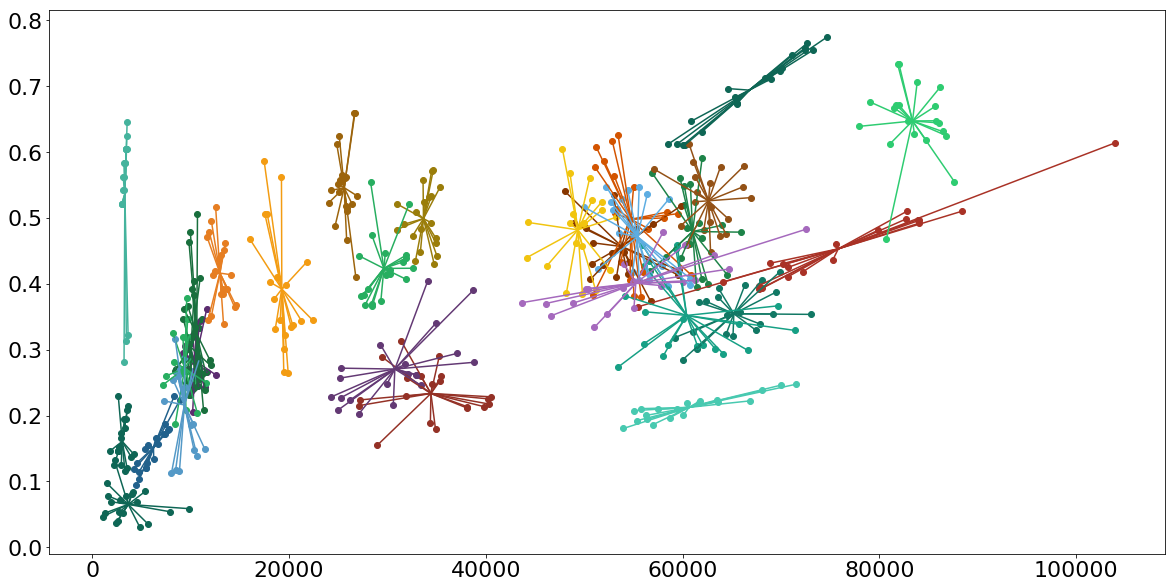

In [155]:
fig, ax = plt.subplots()
list_color=['#A93226', '#943126', '#633974', '#5B2C6F', '#21618C', '#117864', '#0E6655', 
           '#0E6655', '#196F3D', '#0E6655', '#196F3D', '#1D8348', '#9A7D0A', '#9C640C', 
           '#935116', '#873600', '#D35400', '#E67E22', '#F39C12', '#F1C40F', '#2ECC71', 
           '#27AE60', '#16A085', '#27AE60', '#45B39D', '#48C9B0', '#5DADE2', '#5499C7', 
           '#A569BD', '#9B59B6', '#EC7063', '#CD6155', '#707B7C', '#1C2833', '#626567']
# print(len(dict_AMR_avg_cost_LF))
for AMR_id, color in zip(list_AMR_id_1,list_color):
#     print(AMR_id)
    x=dict_AMR_avg_cost_LF[AMR_id]['cost']
    y=dict_AMR_avg_cost_LF[AMR_id]['LF']
    ax.scatter(x,y,color=color)
    x_mean=dict_AMR_avg_cost_LF[AMR_id]['avg_cost']
    y_mean=dict_AMR_avg_cost_LF[AMR_id]['avg_LF']
    connectpoints(x,y,x_mean,y_mean,color)
    


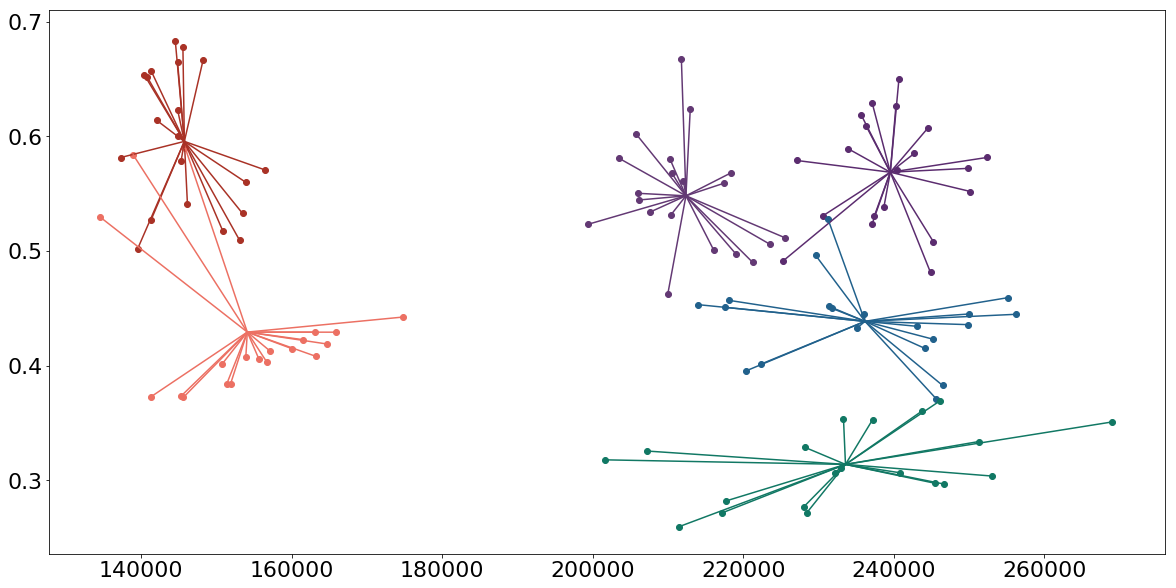

In [157]:
fig, ax = plt.subplots()
list_color=['#A93226', '#EC7063', '#633974', '#5B2C6F', '#21618C', '#117864', '#0E6655', 
           '#0E6655', '#196F3D', '#0E6655', '#196F3D', '#1D8348', '#9A7D0A', '#9C640C', 
           '#935116', '#873600', '#D35400', '#E67E22', '#F39C12', '#F1C40F', '#2ECC71', 
           '#27AE60', '#16A085', '#27AE60', '#45B39D', '#48C9B0', '#5DADE2', '#5499C7', 
           '#A569BD', '#9B59B6', '#EC7063', '#CD6155', '#707B7C', '#1C2833', '#626567']
# print(len(dict_AMR_avg_cost_LF))
for AMR_id, color in zip(list_AMR_id_2,list_color):
#     print(AMR_id)
    x=dict_AMR_avg_cost_LF[AMR_id]['cost']
    y=dict_AMR_avg_cost_LF[AMR_id]['LF']
    ax.scatter(x,y,color=color)
    x_mean=dict_AMR_avg_cost_LF[AMR_id]['avg_cost']
    y_mean=dict_AMR_avg_cost_LF[AMR_id]['avg_LF']
    connectpoints(x,y,x_mean,y_mean,color)
    


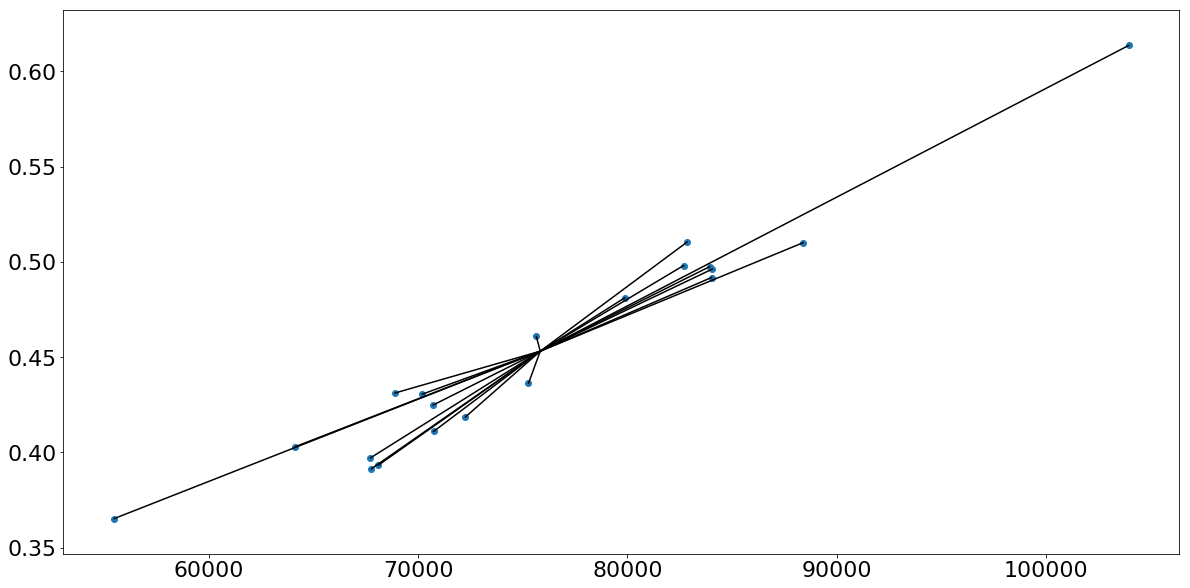

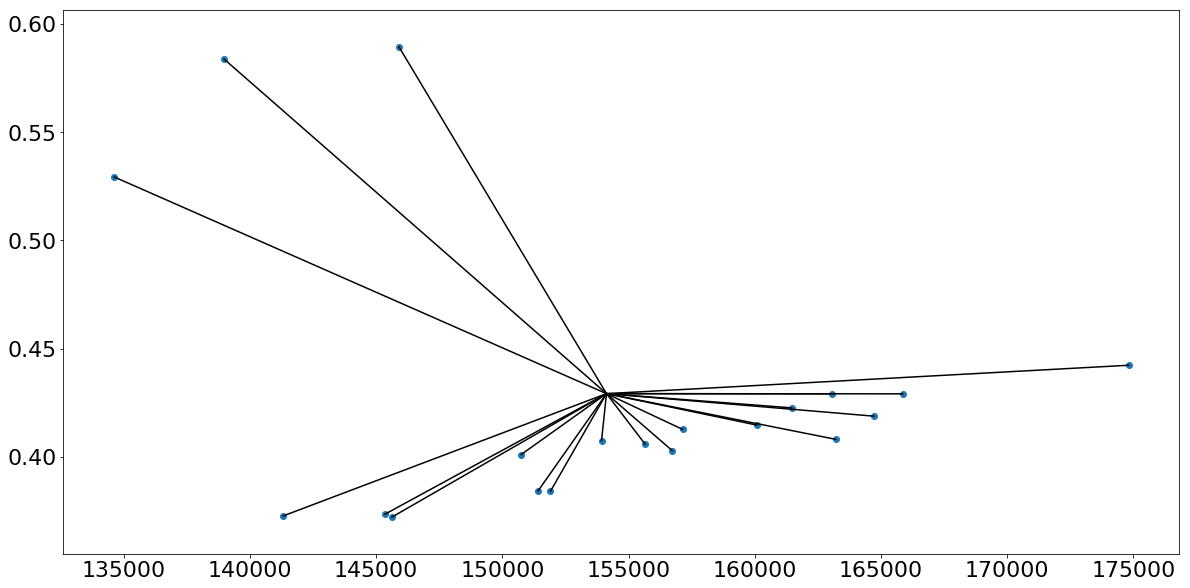

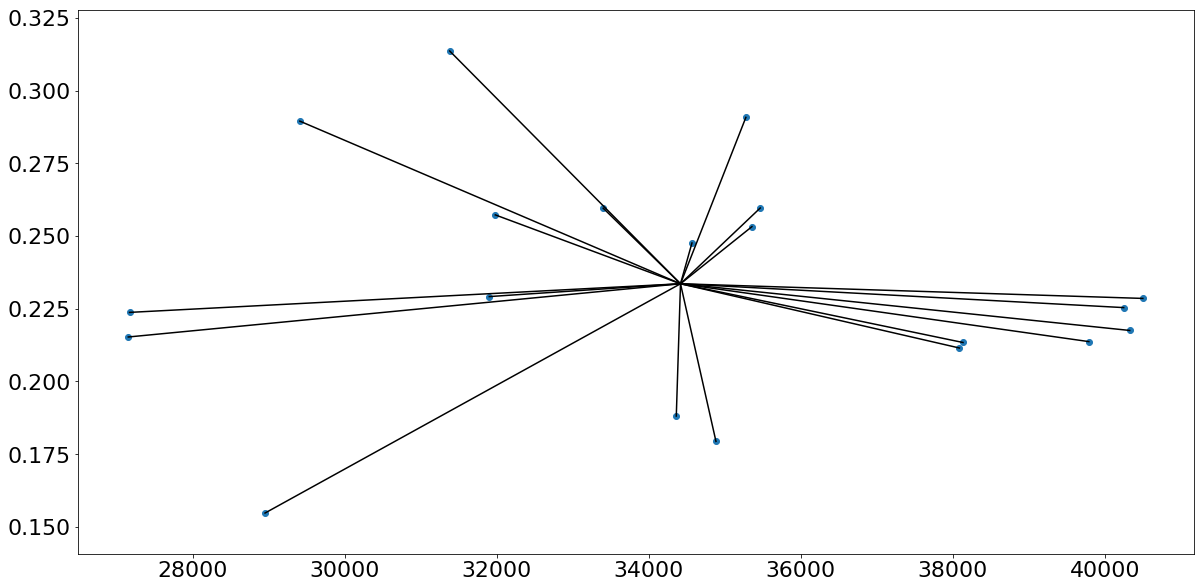

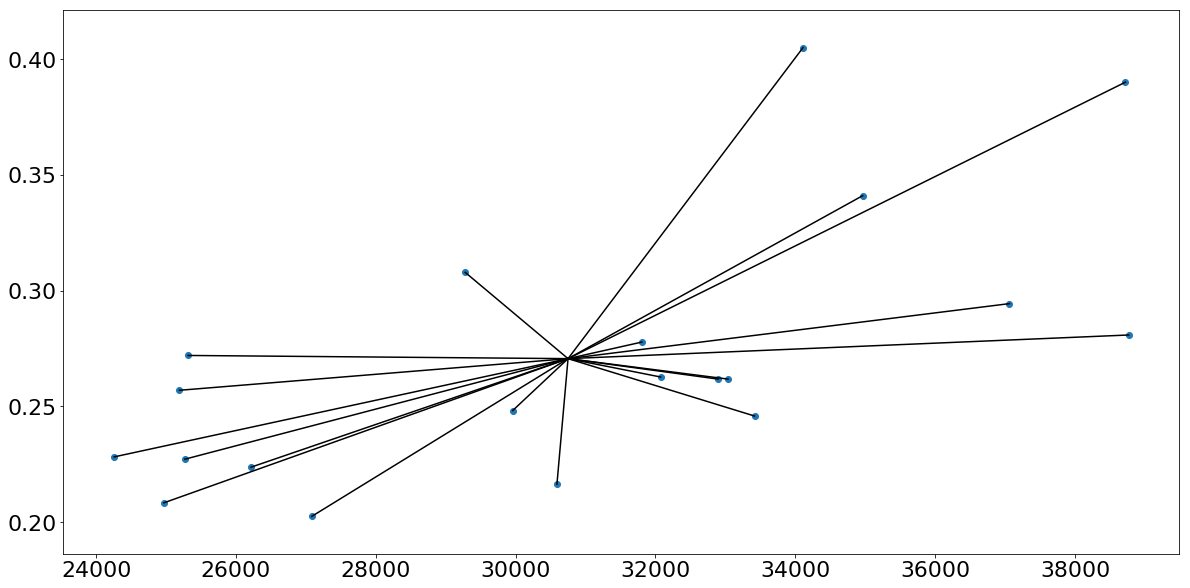

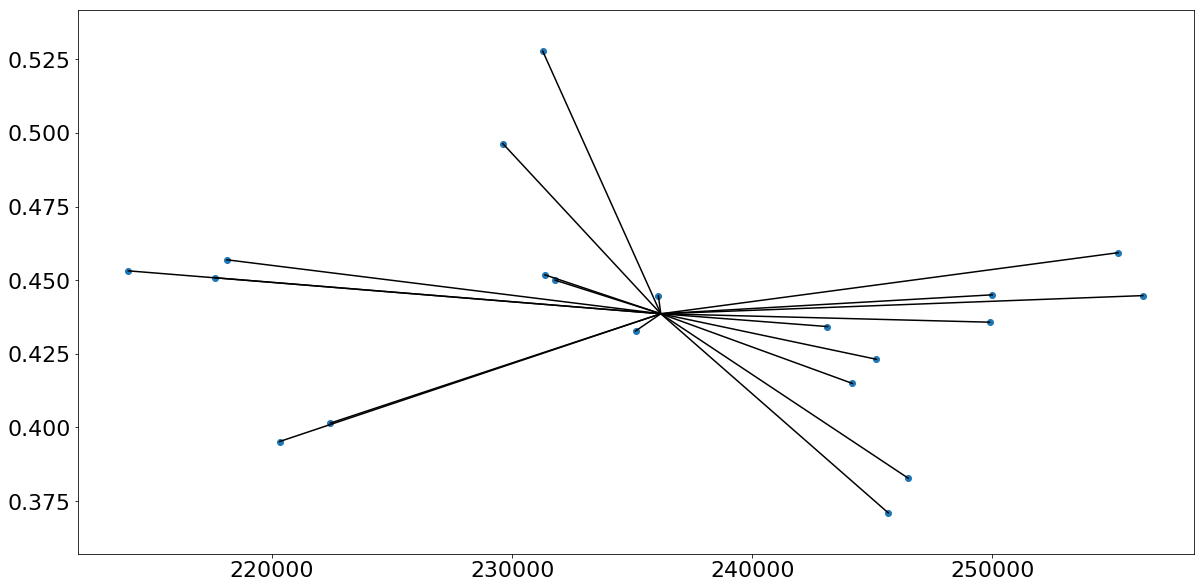

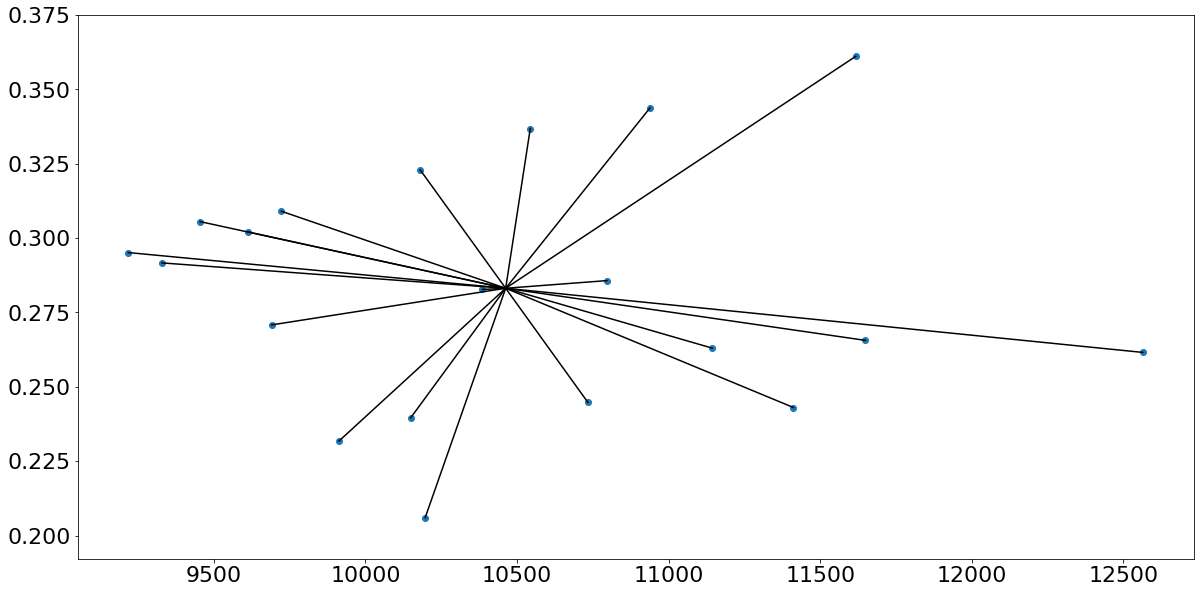

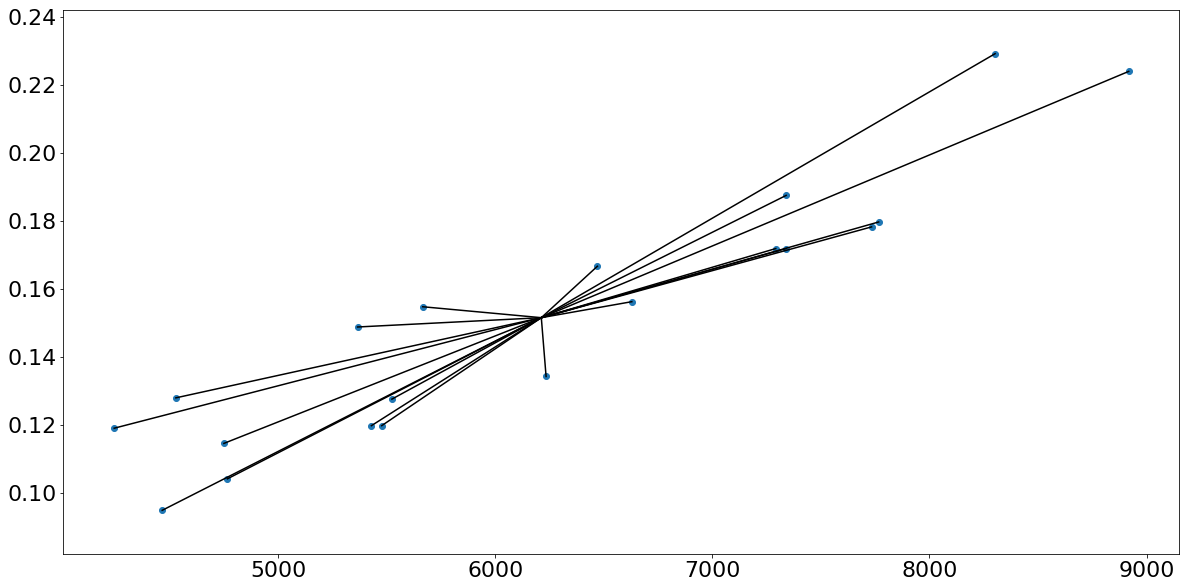

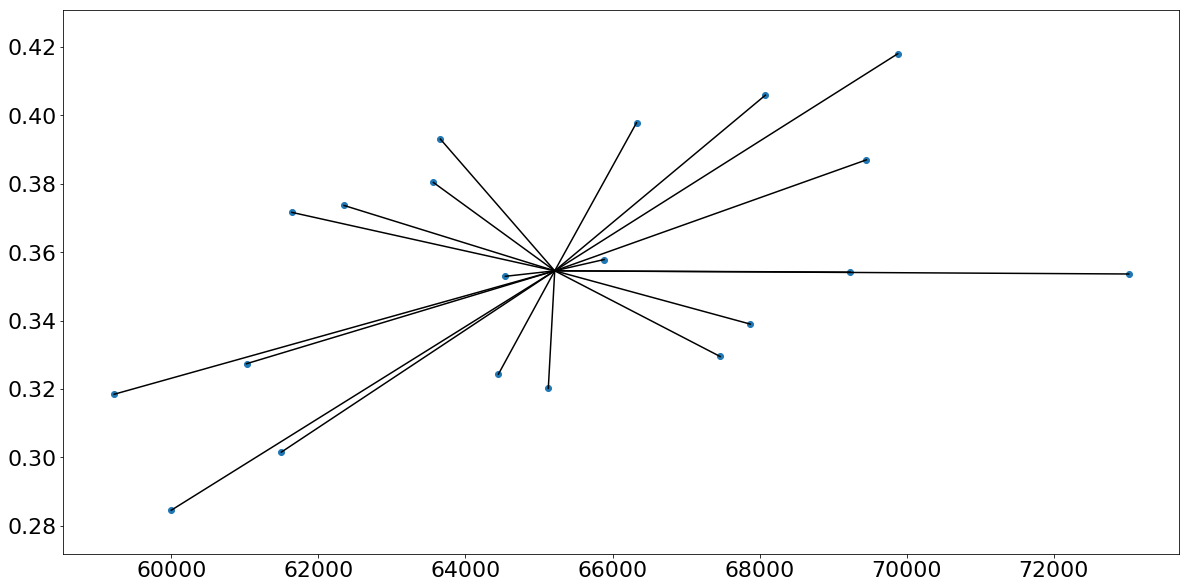

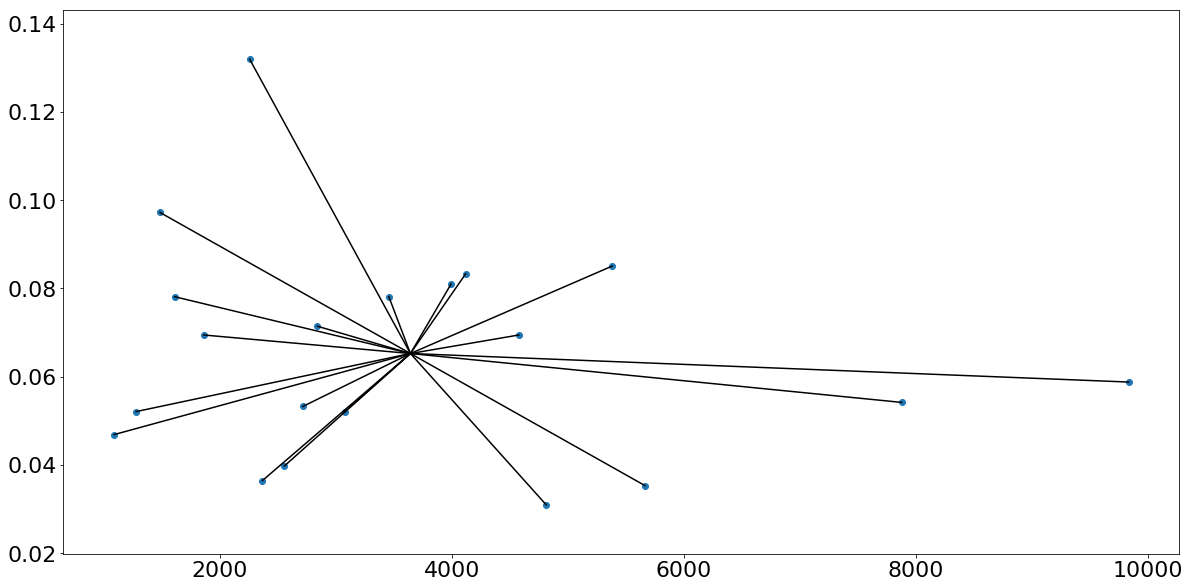

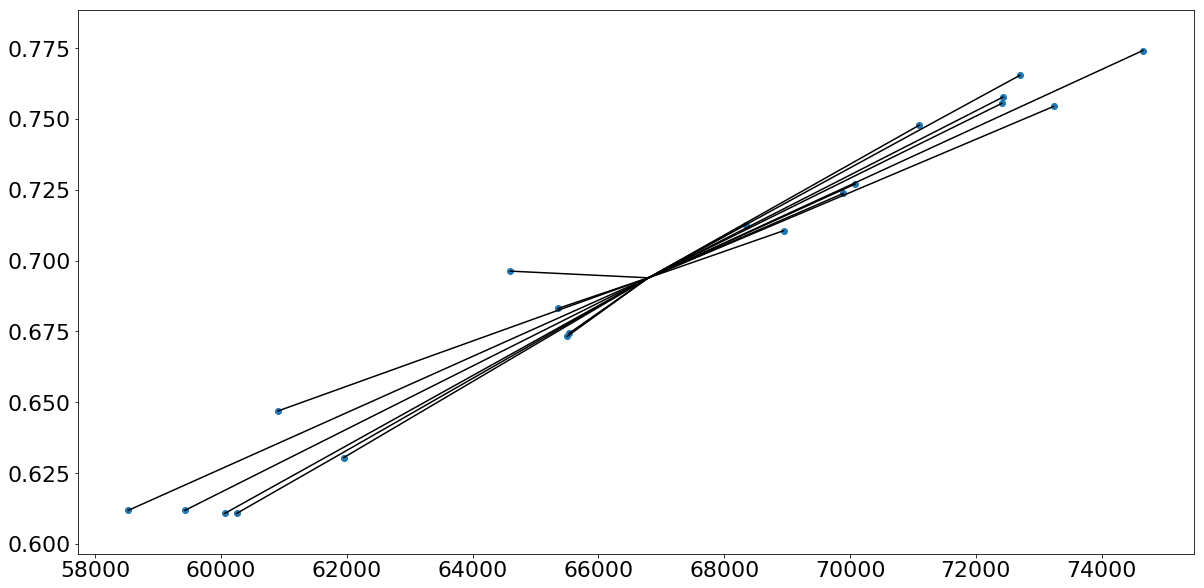

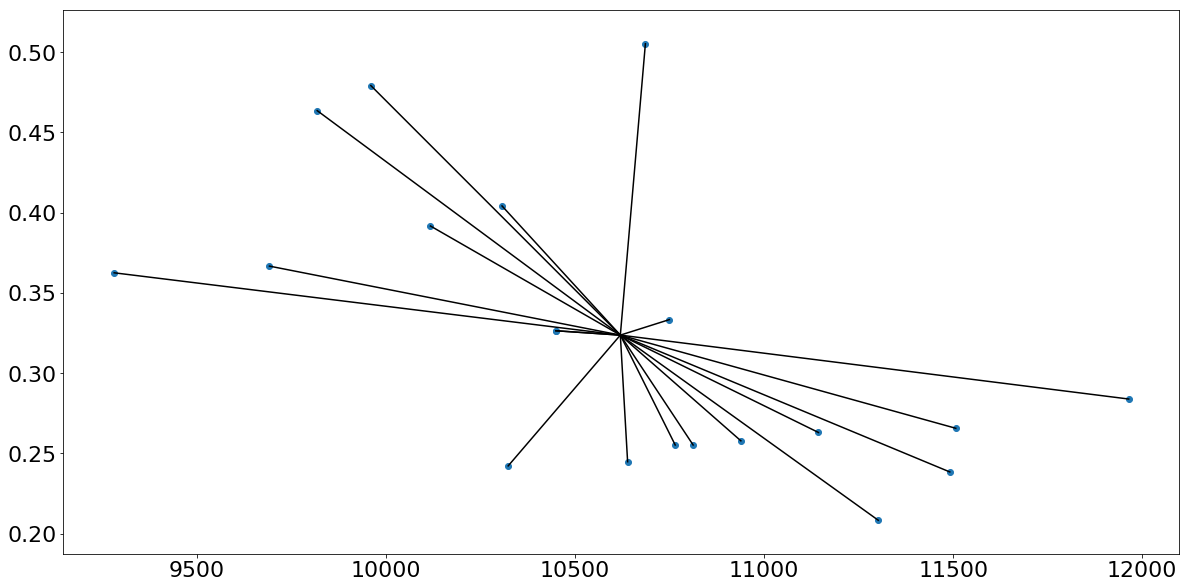

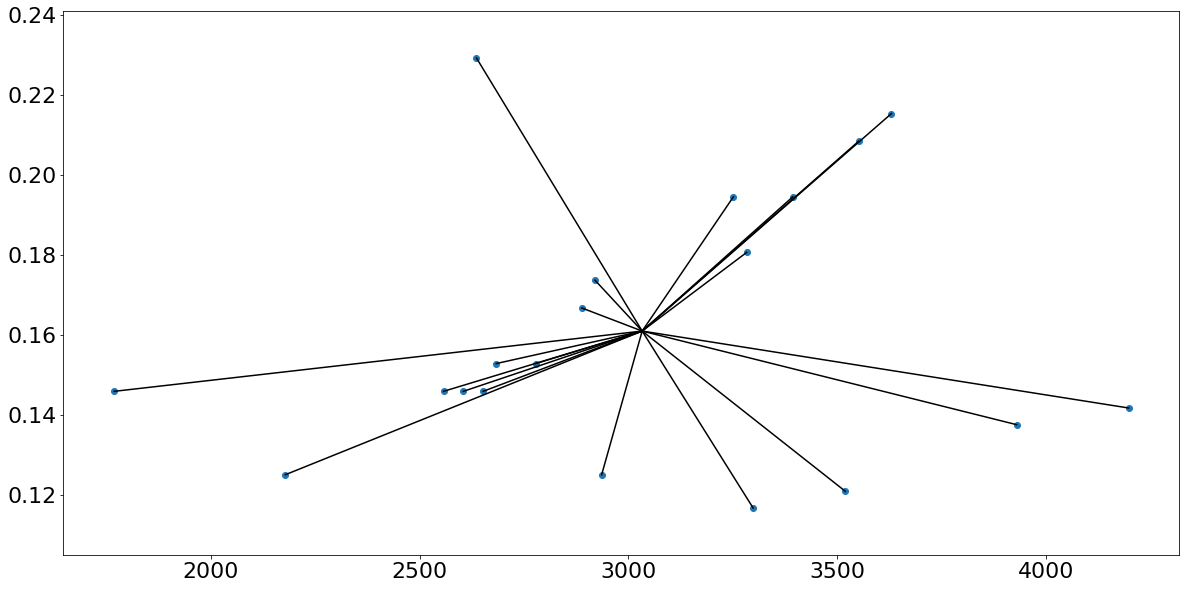

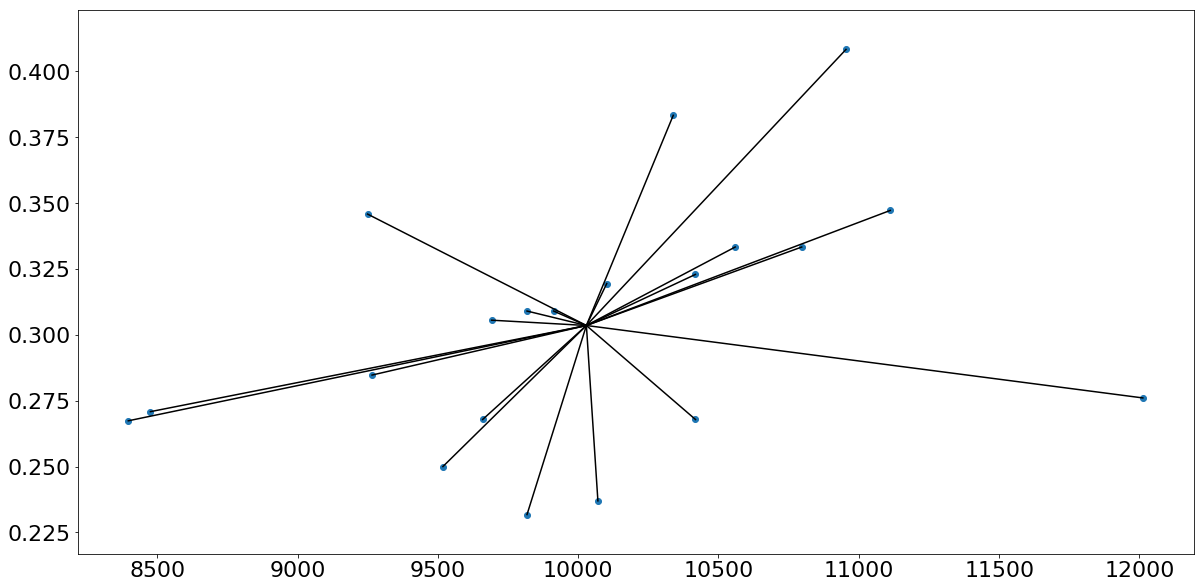

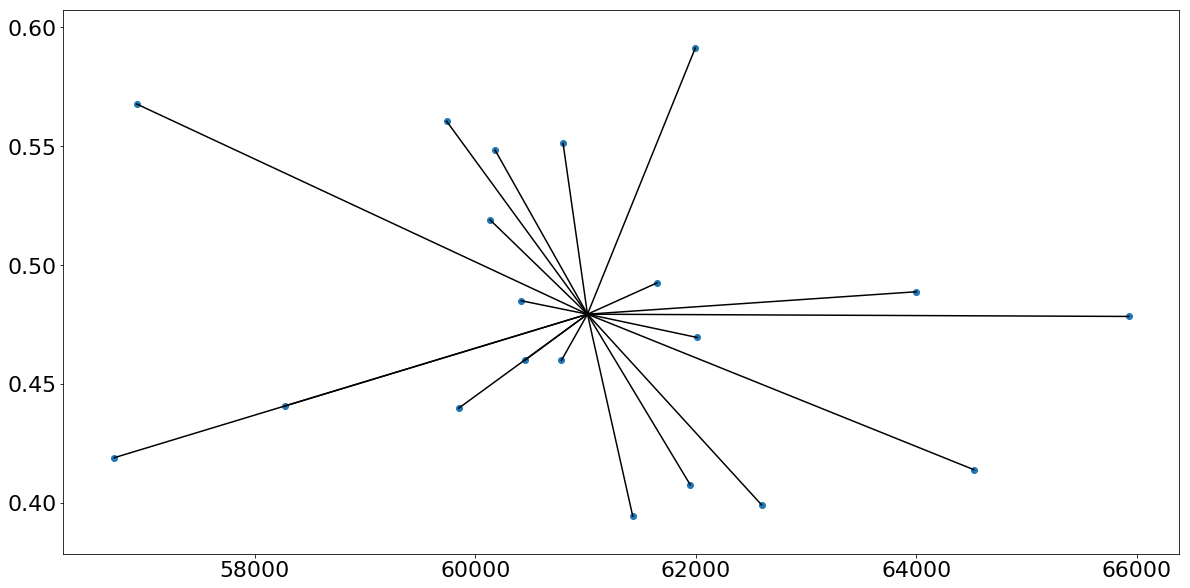

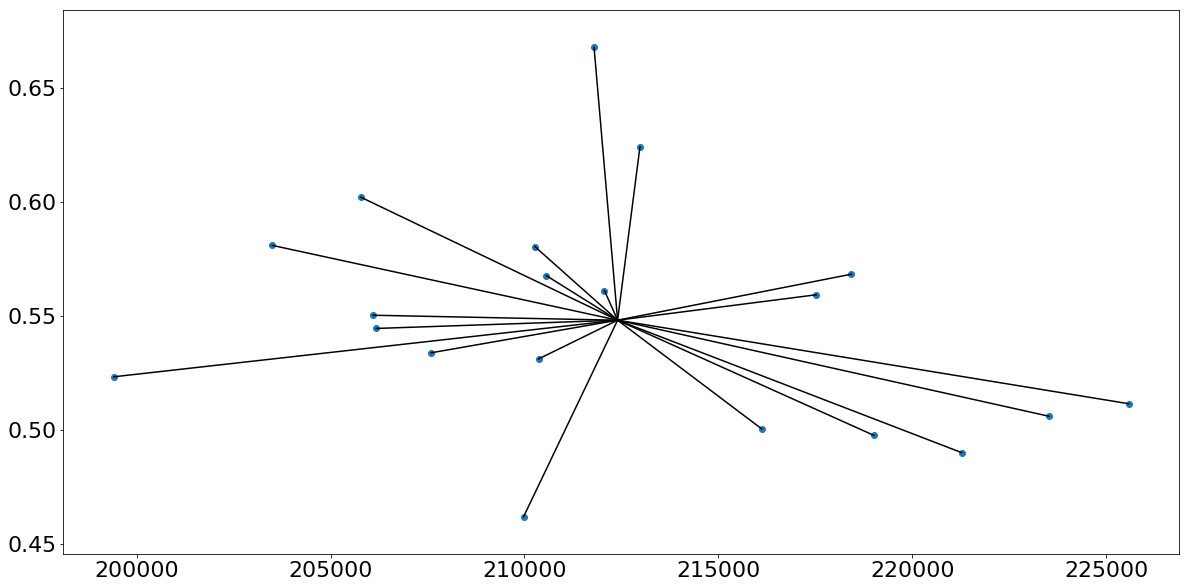

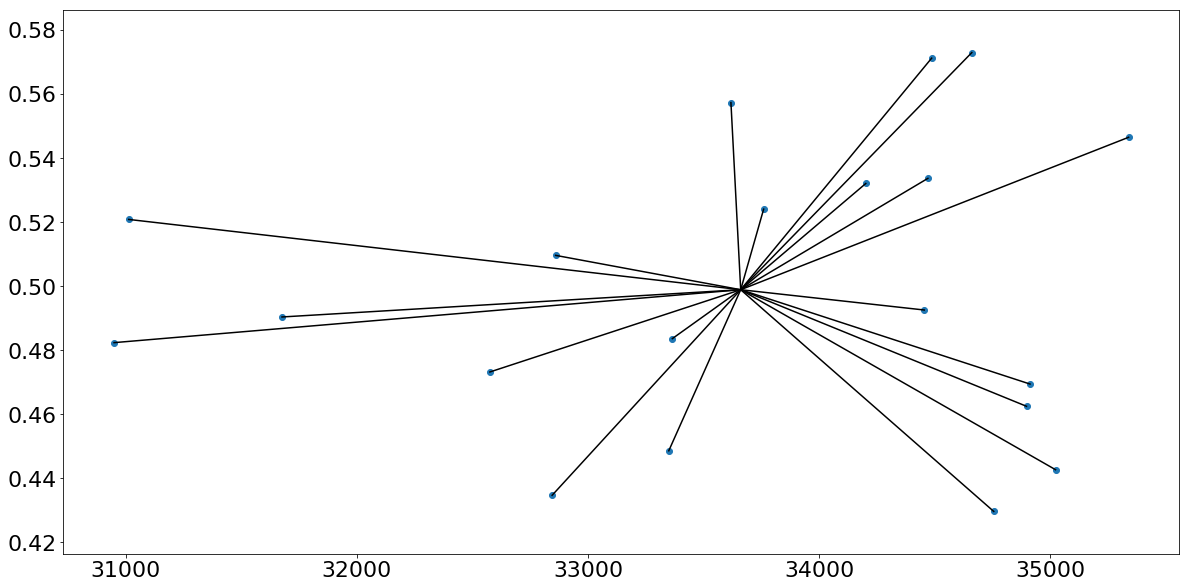

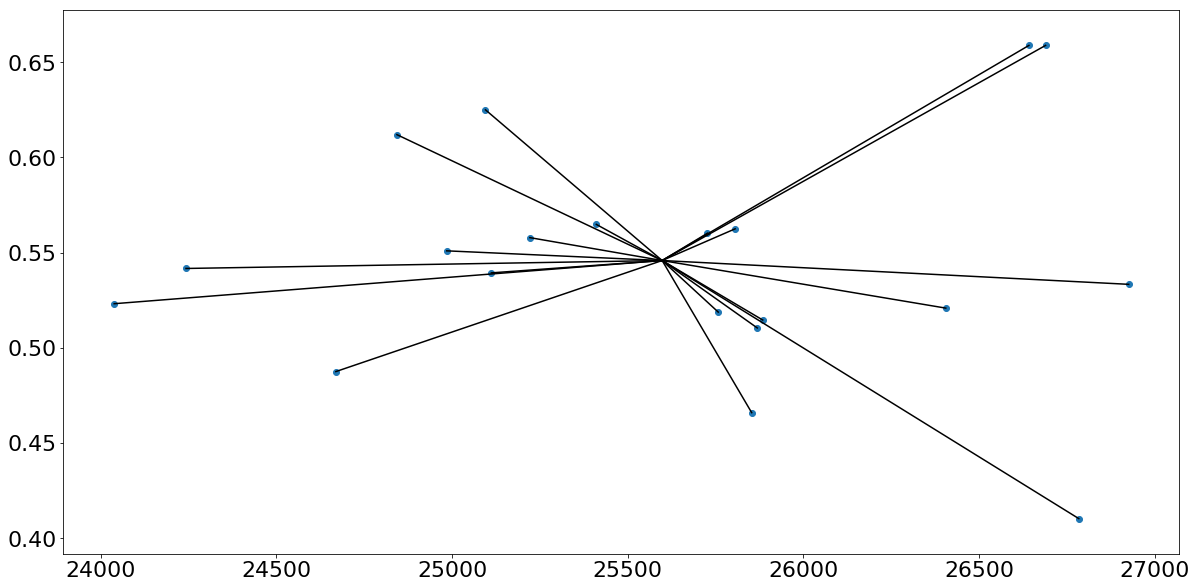

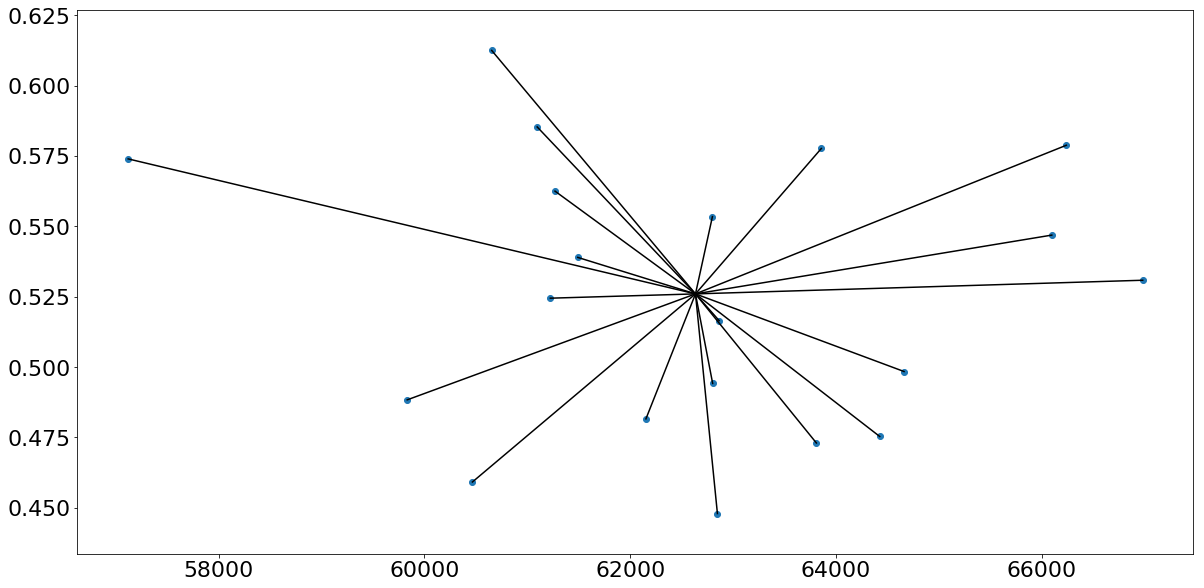

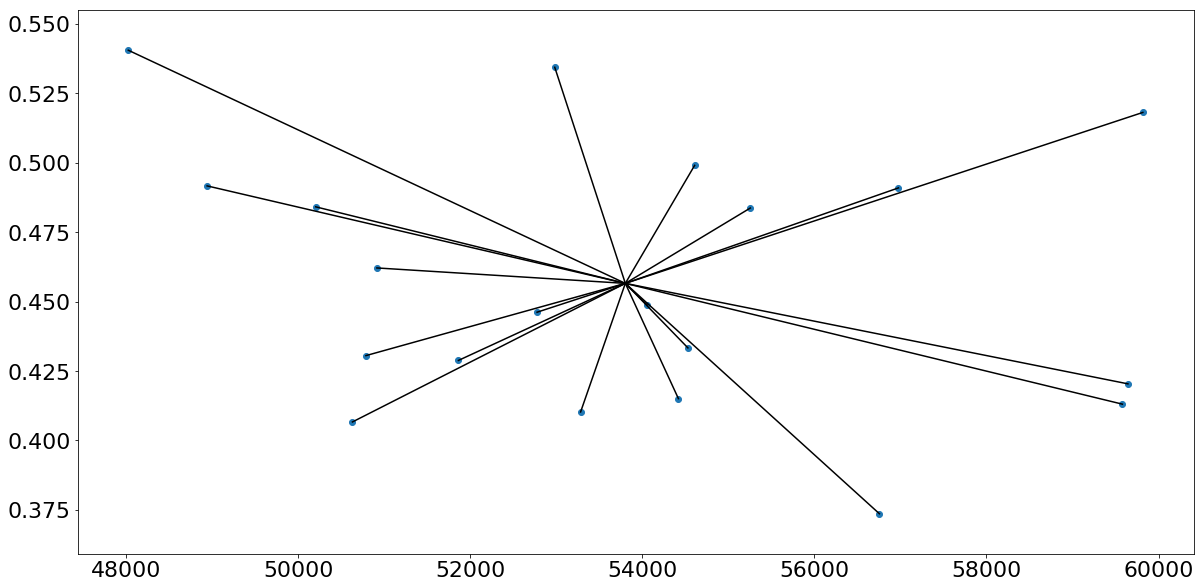

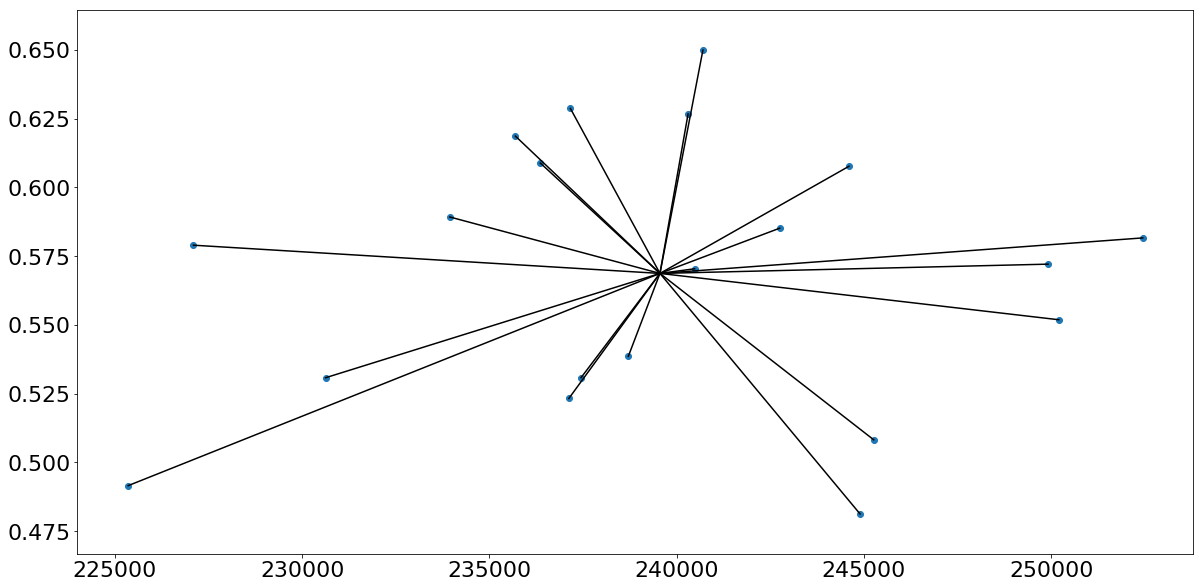

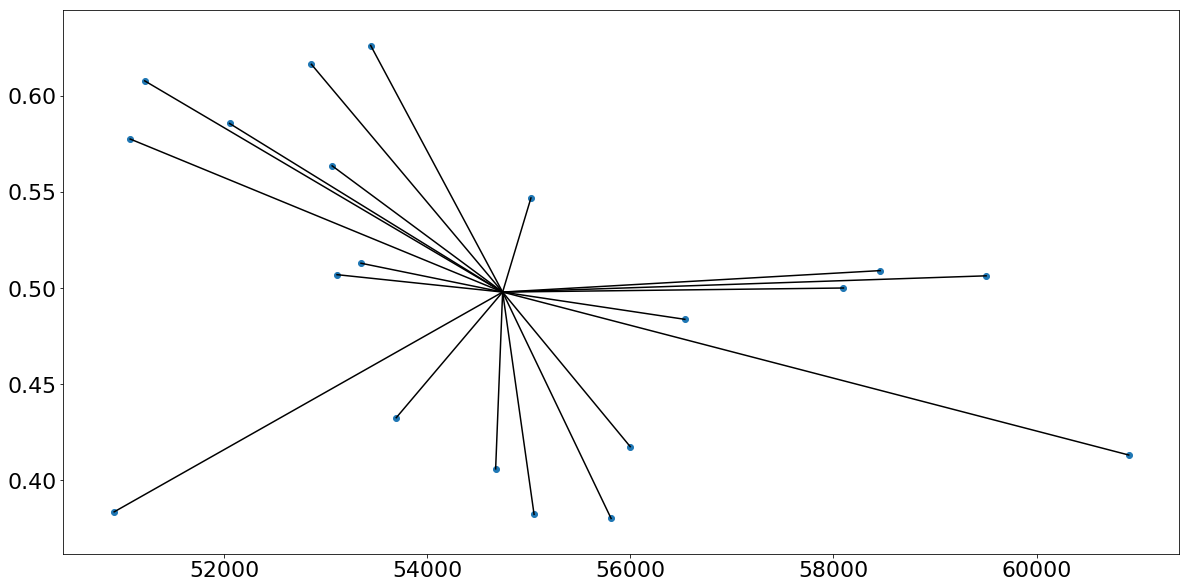

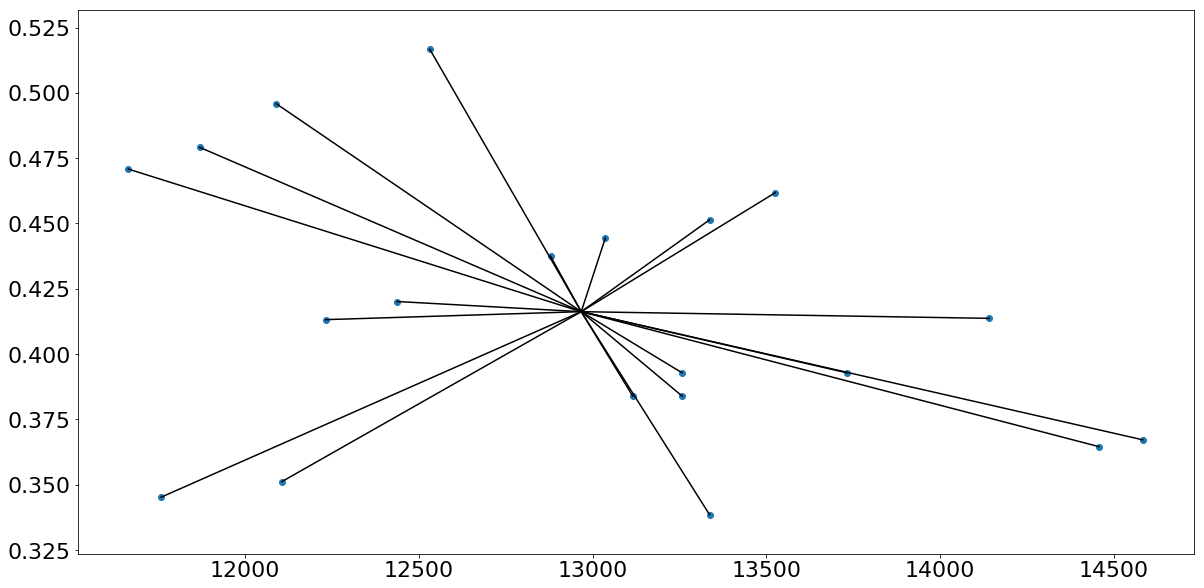

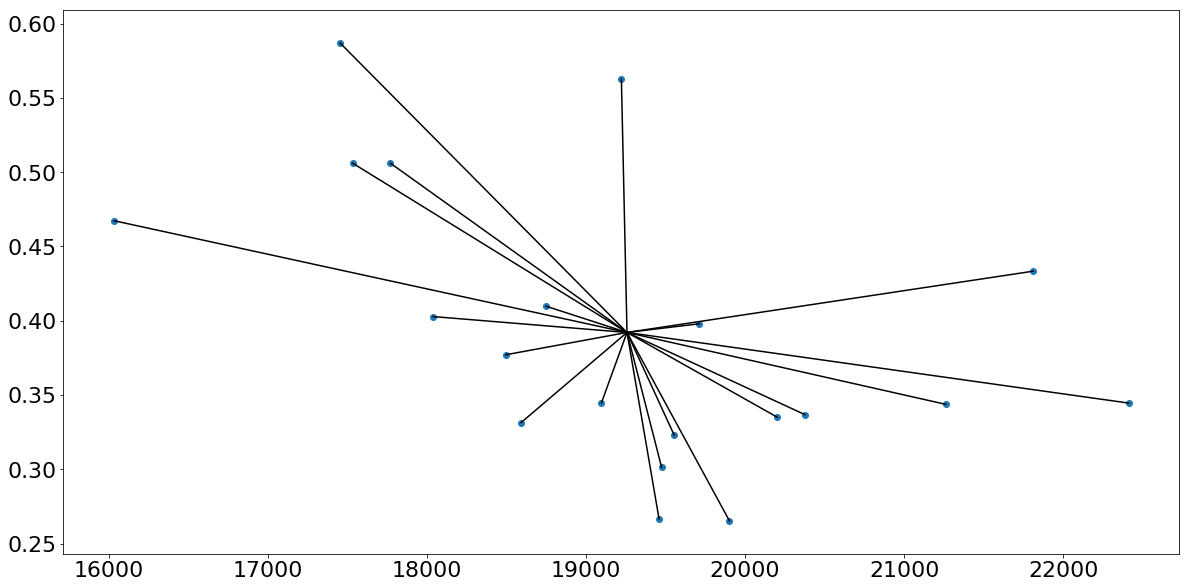

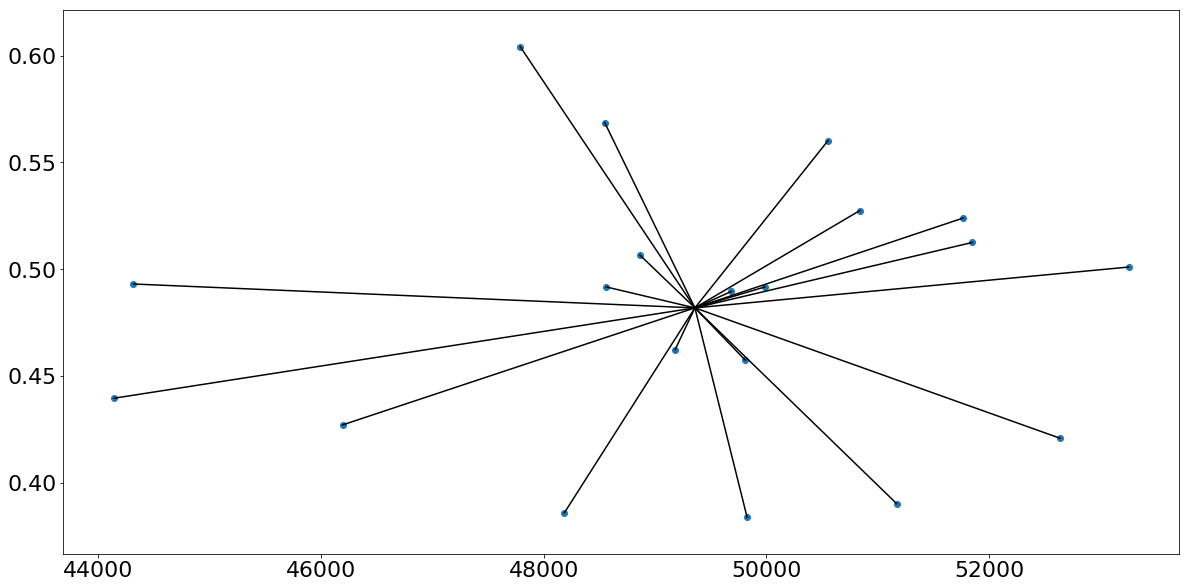

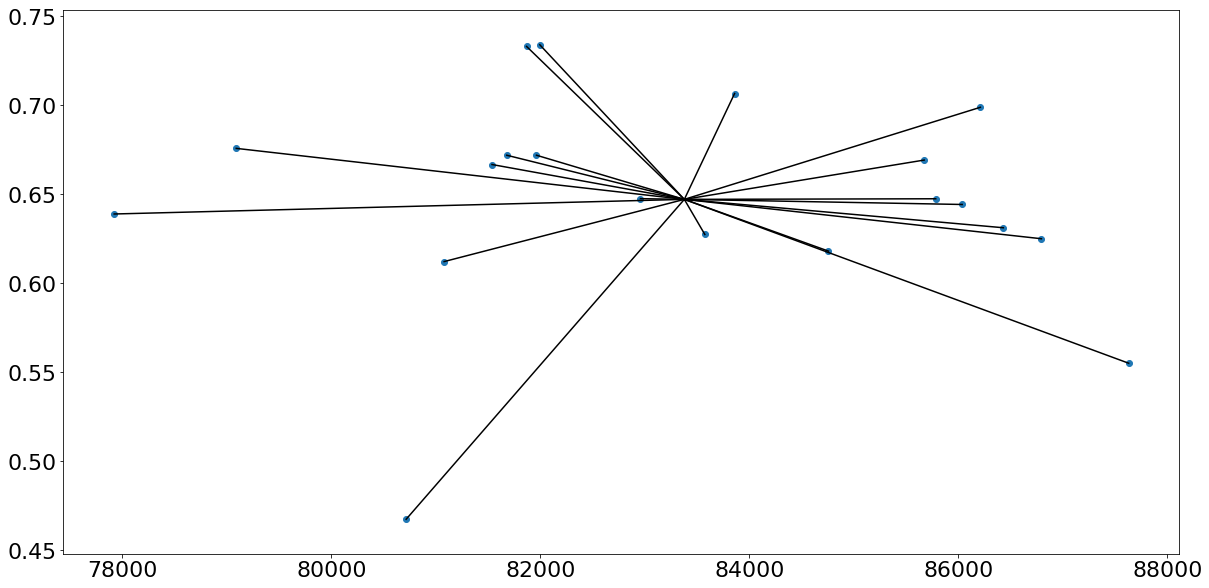

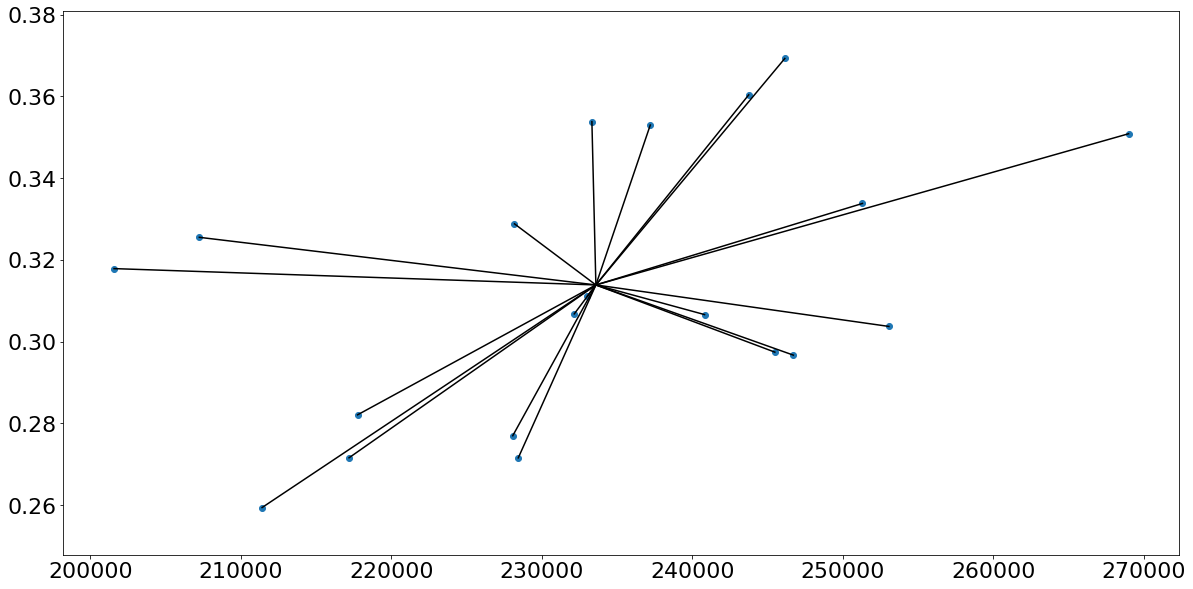

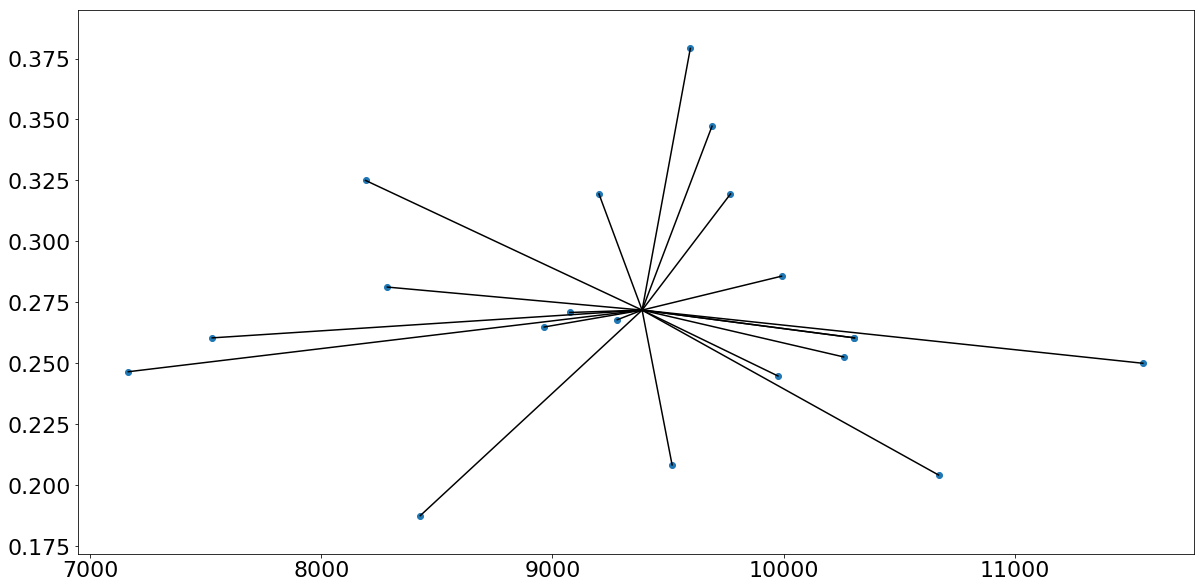

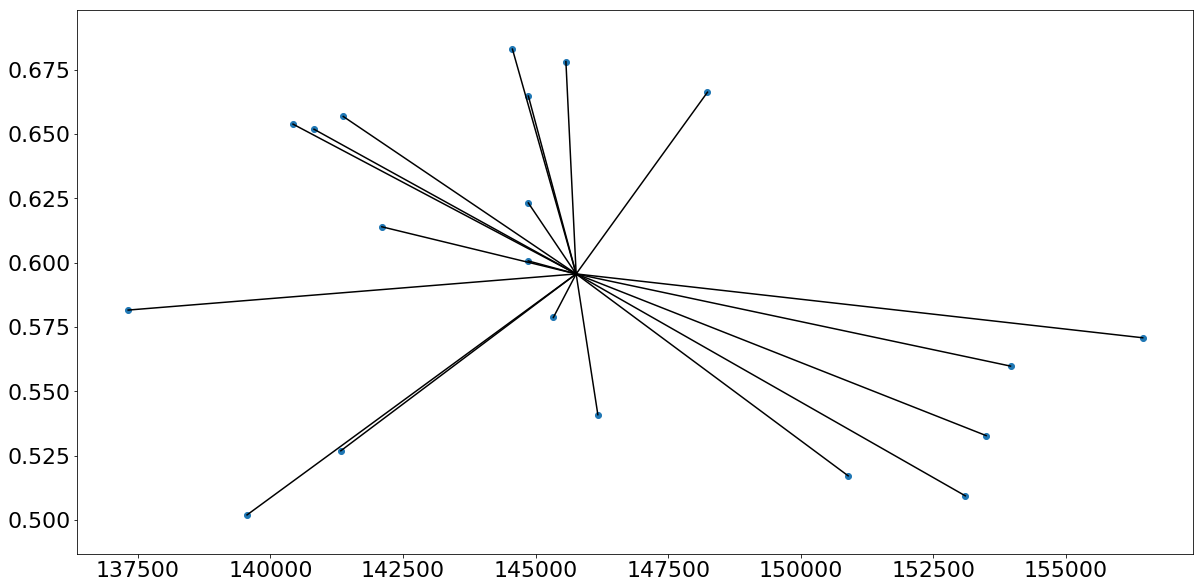

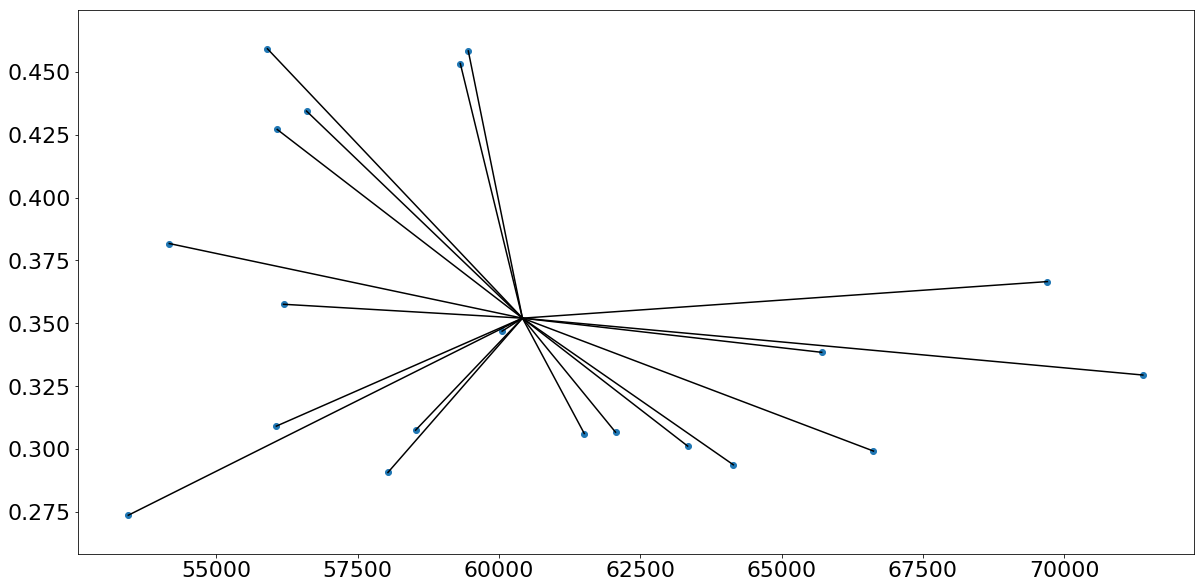

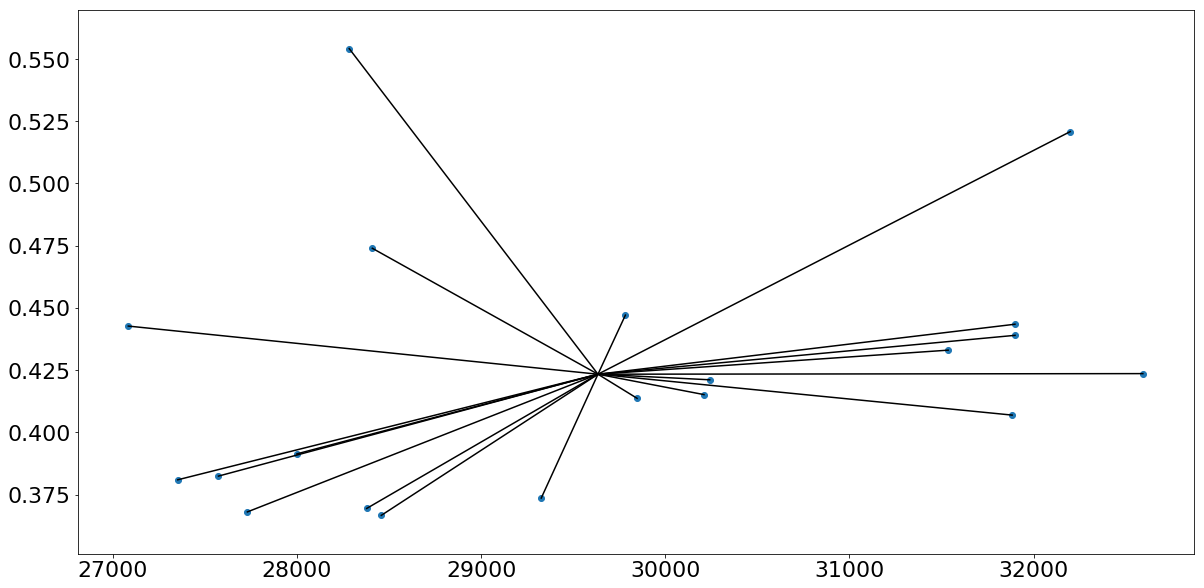

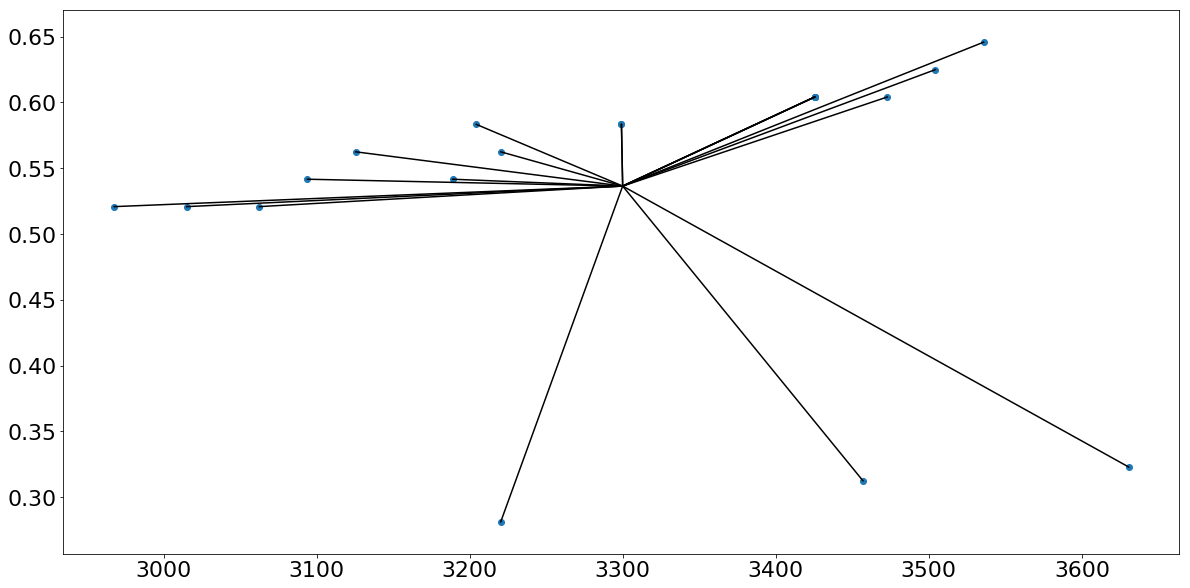

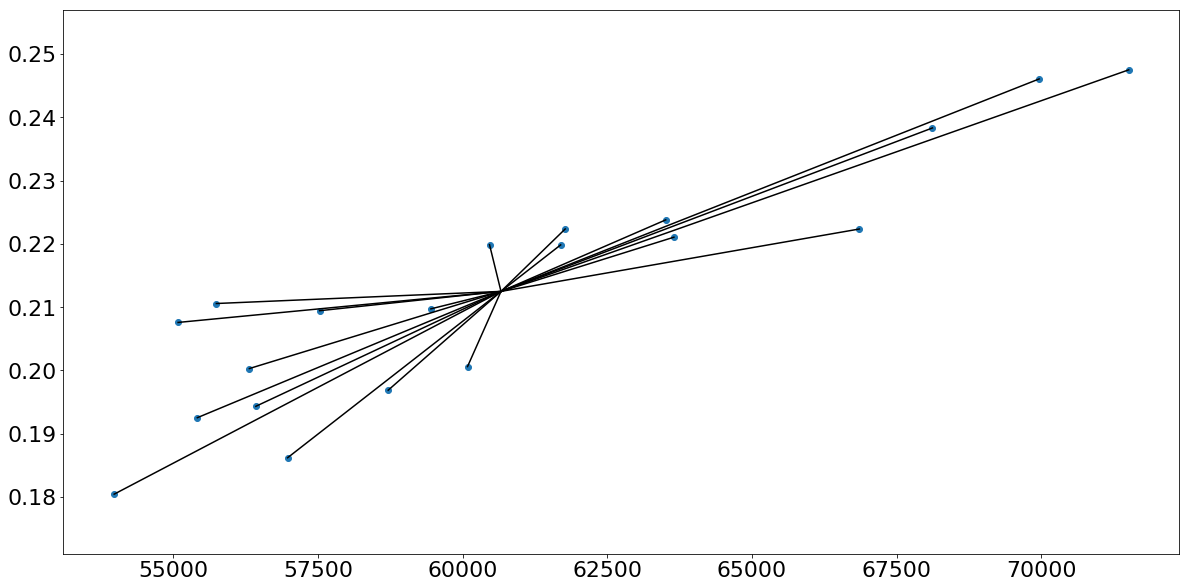

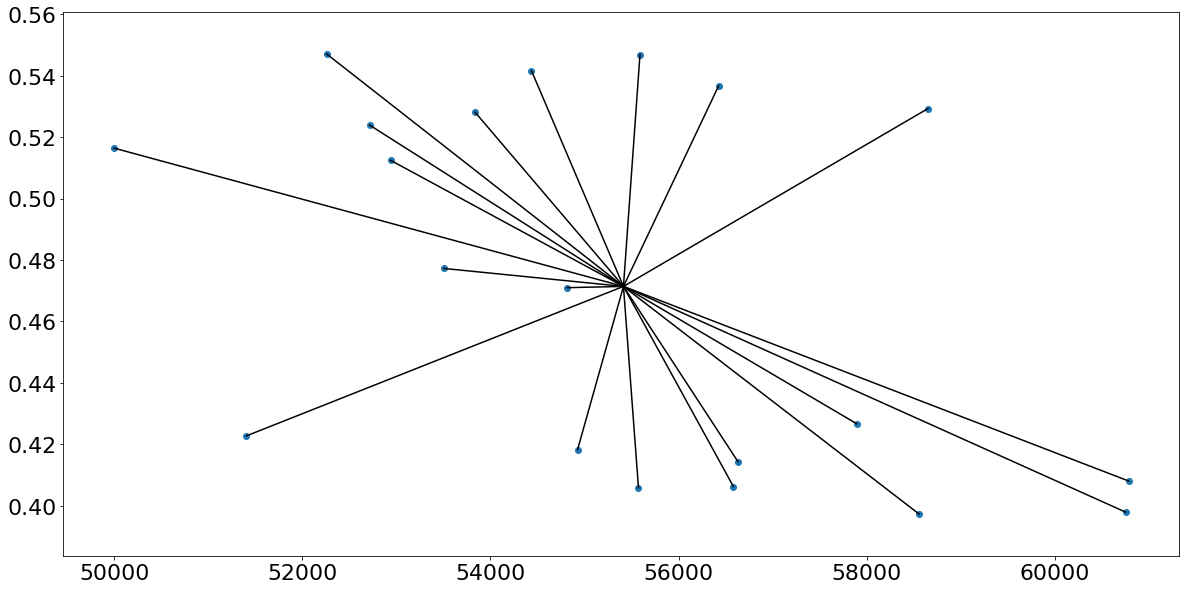

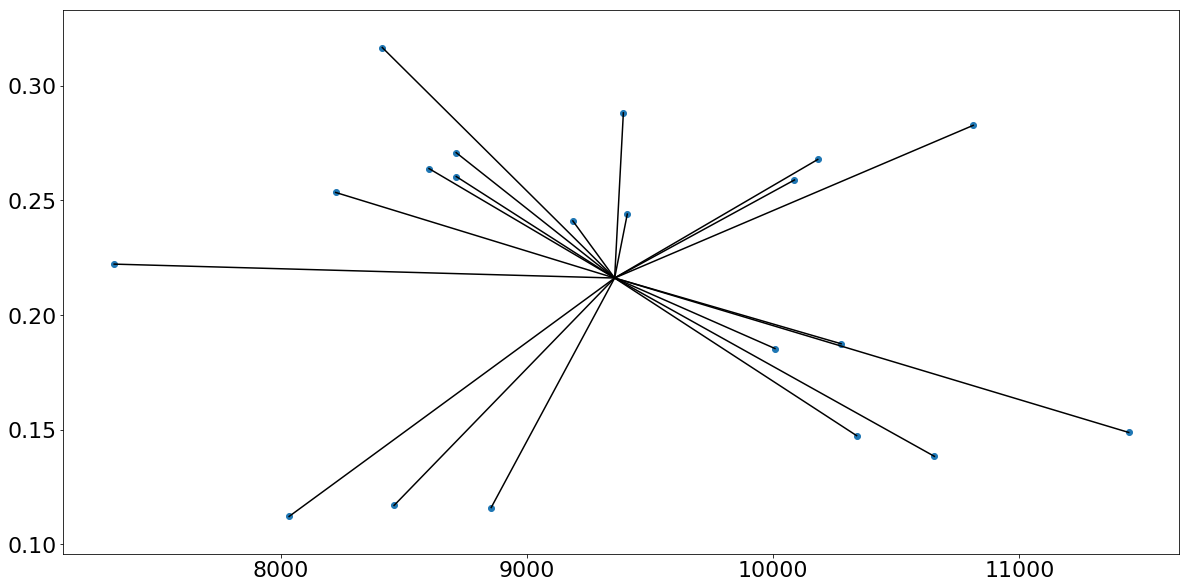

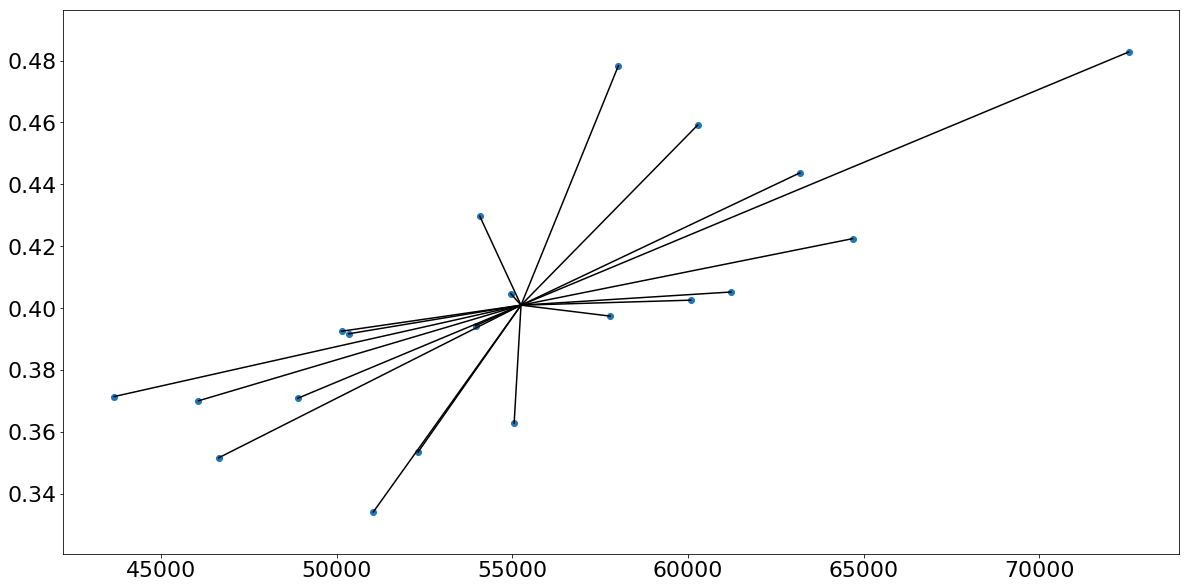

In [93]:
for AMR_id in list(dict_AMR_avg_cost_LF.keys()):
    fig, ax = plt.subplots()
    x=dict_AMR_avg_cost_LF[AMR_id]['cost']
    y=dict_AMR_avg_cost_LF[AMR_id]['LF']
    ax.scatter(x,y)
    x_mean=dict_AMR_avg_cost_LF[AMR_id]['avg_cost']
    y_mean=dict_AMR_avg_cost_LF[AMR_id]['avg_LF']
    connectpoints(x,y,x_mean,y_mean)
    plt.show()
# x=[ dict_AMR_avg_cost_LF[x]['avg_cost'] for x in dict_AMR_avg_cost_LF]
# y=[ dict_AMR_avg_cost_LF[y]['avg_LF'] for y in dict_AMR_avg_cost_LF]
# name=[x for x in dict_AMR_avg_cost_LF]
# for i, txt in enumerate(name):
#     ax.annotate(txt, (x[i], y[i]))

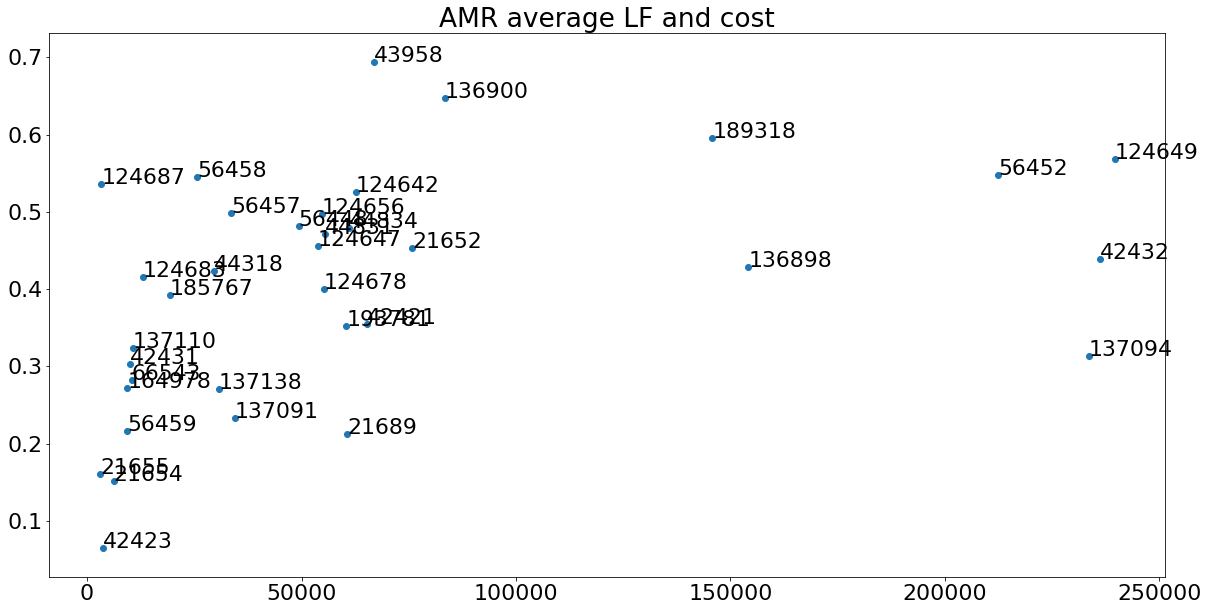

In [72]:
del dict_AMR_avg_cost_LF[42422]
x=[ dict_AMR_avg_cost_LF[x]['avg_cost'] for x in dict_AMR_avg_cost_LF]
y=[ dict_AMR_avg_cost_LF[y]['avg_LF'] for y in dict_AMR_avg_cost_LF]

fig, ax = plt.subplots()
ax.scatter(x,y)

name=[x for x in dict_AMR_avg_cost_LF]
for i, txt in enumerate(name):
    ax.annotate(txt, (x[i], y[i]))
    
    
ax.set_title('AMR average LF and cost')
plt.show()

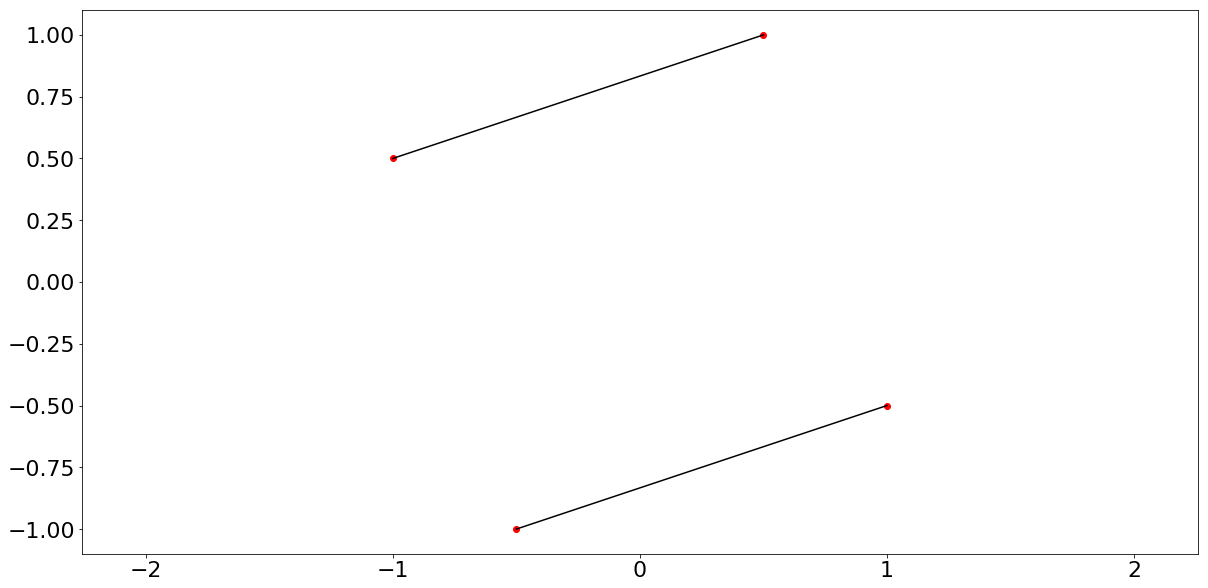

In [89]:
x=[-1 ,0.5 ,1,-0.5]
y=[ 0.5,  1, -0.5, -1]

plt.plot(x,y, 'ro')

def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    plt.plot([x1,x2],[y1,y2],'k-')

connectpoints(x,y,0,1)
connectpoints(x,y,2,3)

plt.axis('equal')
plt.show()